In [1]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import copy
import h5py
import numpy as np
import matplotlib
import re

import matplotlib.pyplot as plt
from dedalus.extras import plot_tools

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

import os
from os import listdir

In [2]:
Lx, Ly, Lz = 12,12,1
Nx, Ny, Nz = 384, 384, 32

Ra_D = -1.0e6


Prandtl = 1.0
D_0 = 0
D_H = 1/3
M_0 = 0
M_H = -1

N_s2=4/3

dealias = 3/2
stop_sim_time = 2000
timestepper = d3.RK222
max_timestep = 0.125
dtype = np.float64

nu = (Ra_D / (Prandtl*(D_0-D_H)*Lz**3))**(-1/2)

In [3]:
folder_dir = "analysis"

file_paths = [os.path.join(folder_dir, file) for file in listdir(folder_dir) if os.path.isfile(os.path.join(folder_dir, file)) and file.endswith('.h5')]
#sort by the number in the file name
file_paths.sort(key=lambda f: int(re.sub('\D', '', f)))
print(file_paths)

['analysis/analysis_s1.h5', 'analysis/analysis_s2.h5']


In [4]:
"""
TOTAL KE
"""

all_tot_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        tot_ke = file['tasks']['total kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_tot_ke.append(np.sum(tot_ke[t]))
print(all_tot_ke[:10])
print(max(all_tot_ke))
"""


all_mean_ke = []

for file in file_paths:
    with h5py.File(file, mode='r') as file:
        mean_ke = file['tasks']['mean kinetic energy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            all_mean_ke.append(np.average(mean_ke[t]))
"""

[0.0, 2.81689765065848e-08, 7.004503074575186e-08, 2.5443276459606815e-07, 1.292878571024468e-06, 8.035139194396352e-06, 5.659245201543194e-05, 0.00043469965606163154, 0.0035574472460128156, 0.03163718975390054]
1.9564992671134336


"\n\n\nall_mean_ke = []\n\nfor file in file_paths:\n    with h5py.File(file, mode='r') as file:\n        mean_ke = file['tasks']['mean kinetic energy']\n        st = file['scales/sim_time']\n        simtime = np.array(st)\n        for t in range(0, len(simtime)):\n            all_mean_ke.append(np.average(mean_ke[t]))\n"

2000
2000


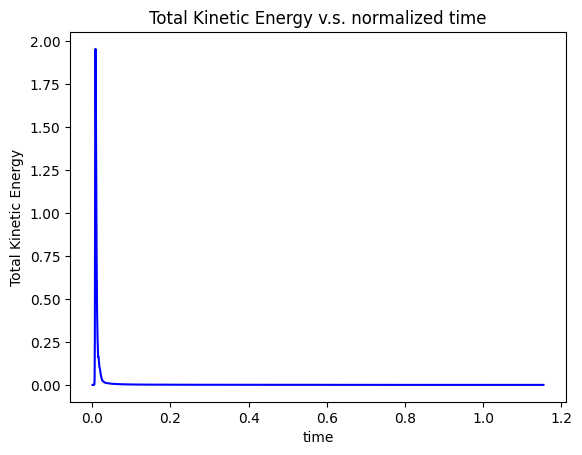

/state/partition1/job-45043350/ipykernel_4108721/3293583585.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')


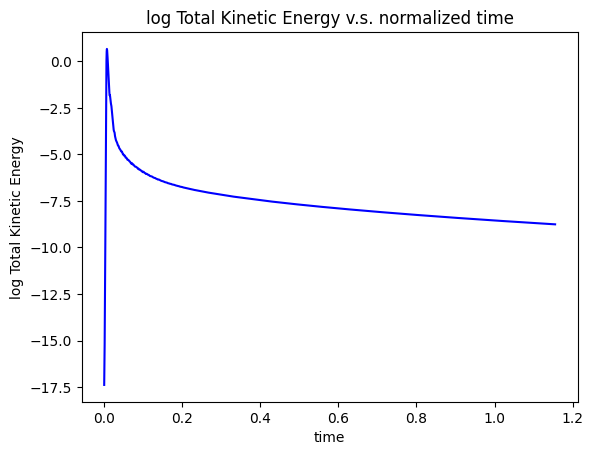

/state/partition1/job-45043350/ipykernel_4108721/3293583585.py:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.array(range(len(figure_x_axis))), np.log(all_tot_ke), color = 'blue')


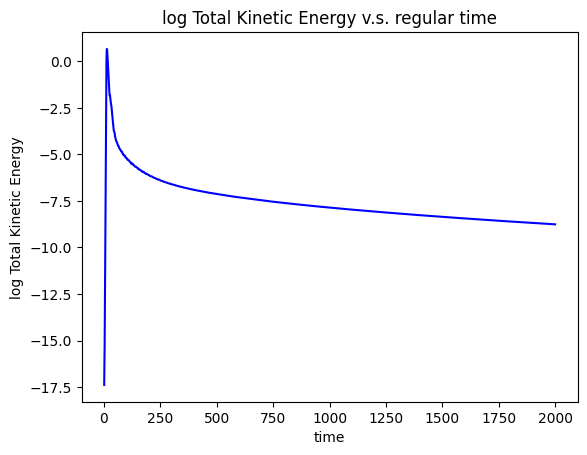

"\nprint(len(all_mean_ke))\nfigure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_mean_ke)+1)])\nprint(len(figure_x_axis))\nplt.plot(figure_x_axis, all_mean_ke, color = 'blue')\nplt.xlabel('time')\nplt.ylabel('Mean Kinetic Energy')\nplt.title('Mean Kinetic Energy v.s. normalized time')\nplt.show()\nplt.clf()\nplt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')\nplt.xlabel('time')\nplt.ylabel('log Mean Kinetic Energy')\nplt.title('log Mean Kinetic Energy v.s. normalized time')\nplt.show()\n"

<Figure size 640x480 with 0 Axes>

In [5]:
print(len(all_tot_ke))
figure_x_axis = np.array([(x*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Total Kinetic Energy')
plt.title('Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
figure_x_axis = np.array([(x*nu/(1**2)) for x in range(1, len(all_tot_ke)+1)])
plt.plot(figure_x_axis, np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()

plt.plot(np.array(range(len(figure_x_axis))), np.log(all_tot_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. regular time')
plt.show()
plt.clf()

"""
plt.plot(np.array(range(len(figure_x_axis)))[600:], np.log(all_tot_ke)[600:], color = 'blue')
plt.xlabel('time')
plt.ylabel('log Total Kinetic Energy')
plt.title('log Total Kinetic Energy v.s. regular time')
plt.show()
plt.clf()
"""
"""
print(len(all_mean_ke))
figure_x_axis = np.array([(x/10*nu/(1**2)) for x in range(1, len(all_mean_ke)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_mean_ke, color = 'blue')
plt.xlabel('time')
plt.ylabel('Mean Kinetic Energy')
plt.title('Mean Kinetic Energy v.s. normalized time')
plt.show()
plt.clf()
plt.plot(figure_x_axis, np.log(all_mean_ke), color = 'blue')
plt.xlabel('time')
plt.ylabel('log Mean Kinetic Energy')
plt.title('log Mean Kinetic Energy v.s. normalized time')
plt.show()
"""

In [6]:
all_tot_uy = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy = file['tasks']['tot uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy_each = uy[t][0][0]
            all_tot_uy.append(uy_each)
print(all_tot_uy[3])
all_tot_ux = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux = file['tasks']['tot ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux_each = ux[t][0][0]
            all_tot_ux.append(ux_each)
print(all_tot_ux[3])
all_tot_uz = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz = file['tasks']['tot uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz_each = uz[t][0][0]
            all_tot_uz.append(uz_each)
print(all_tot_uz[3])

"""
trying to use Fourier series to approximate
"""

[3.46805123e-11]
[4.47662818e-11]
[-2.91270755e-15]


'\ntrying to use Fourier series to approximate\n'

2000
2000


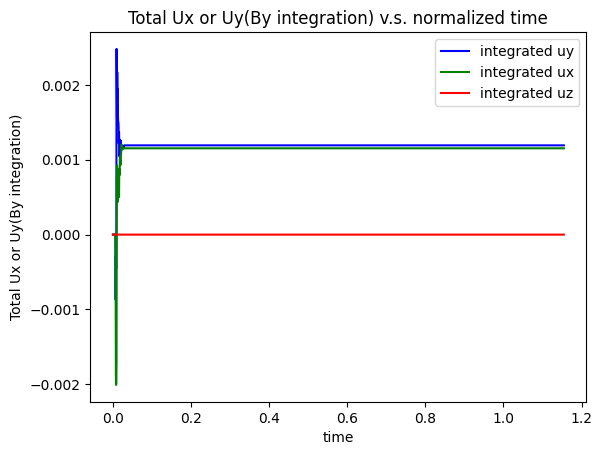

2000
2000


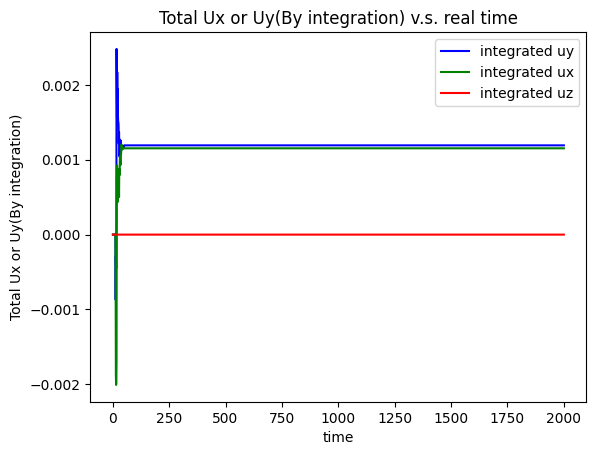

<Figure size 640x480 with 0 Axes>

In [7]:
print(len(all_tot_uy))
figure_x_axis = np.array([(x*nu/(1**2)) for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(figure_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(figure_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. normalized time')
plt.legend()
plt.show()
plt.clf()
"""
I suspect that, because it is integrated, then total uz is always 0
"""

print(len(all_tot_uy))
time_x_axis = np.array([x for x in range(1, len(all_tot_uy)+1)])
print(len(figure_x_axis))
plt.plot(time_x_axis, all_tot_uy, color = 'blue', label='integrated uy')
plt.plot(time_x_axis, all_tot_ux, color = 'green', label='integrated ux')
plt.plot(time_x_axis, all_tot_uz, color = 'red', label='integrated uz')
plt.xlabel('time')
plt.ylabel('Total Ux or Uy(By integration)')
plt.title('Total Ux or Uy(By integration) v.s. real time')
plt.legend()
plt.show()
plt.clf()


In [8]:
all_tot_uy2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uy2 = file['tasks']['ke by uy']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uy2_each = uy2[t][0][0]
            all_tot_uy2.append(uy2_each)
print(all_tot_uy2[3])
all_tot_ux2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        ux2 = file['tasks']['ke by ux']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            ux2_each = ux2[t][0][0]
            all_tot_ux2.append(ux2_each)
print(all_tot_ux2[3])
all_tot_uz2 = []
for file in file_paths:
    with h5py.File(file, mode='r') as file:
        uz2 = file['tasks']['ke by uz']
        st = file['scales/sim_time']
        simtime = np.array(st)
        for t in range(0, len(simtime)):
            uz2_each = uz2[t][0][0]
            all_tot_uz2.append(uz2_each)
print(all_tot_uz2[3])

[1.83760115e-08]
[1.82746075e-08]
[2.17782146e-07]


2000
2000


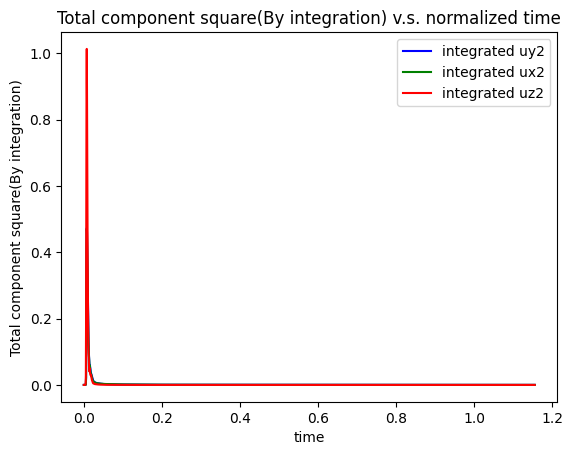

In [9]:
print(len(all_tot_uy2))
figure_x_axis = np.array([(x*nu/(1**2)) for x in range(1, len(all_tot_uy2)+1)])
print(len(figure_x_axis))
plt.plot(figure_x_axis, all_tot_uy2, color = 'blue', label='integrated uy2')
plt.plot(figure_x_axis, all_tot_ux2, color = 'green', label='integrated ux2')
plt.plot(figure_x_axis, all_tot_uz2, color = 'red', label='integrated uz2')
plt.xlabel('time')
plt.ylabel('Total component square(By integration)')
plt.title('Total component square(By integration) v.s. normalized time')
plt.legend()
plt.show()

/state/partition1/job-45043350/ipykernel_4108721/4244836844.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(figure_x_axis, np.array(all_tot_uy2) / np.array(all_tot_ux2), color = 'blue', label='uy2/ux2')
/state/partition1/job-45043350/ipykernel_4108721/4244836844.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(figure_x_axis, np.array(all_tot_ux2) / np.array(all_tot_uz2), color = 'red', label='ux2/uz2')


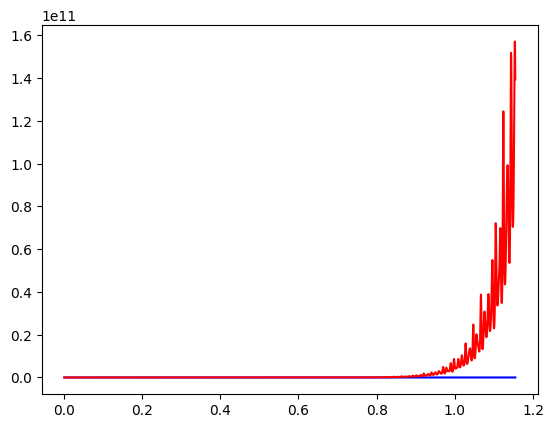

In [10]:
plt.plot(figure_x_axis, np.array(all_tot_uy2) / np.array(all_tot_ux2), color = 'blue', label='uy2/ux2')
plt.plot(figure_x_axis, np.array(all_tot_ux2) / np.array(all_tot_uz2), color = 'red', label='ux2/uz2')